<a href="https://colab.research.google.com/github/himanshu27tasveer/face_rec/blob/main/check_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


--------train_result_0 parameters--------
train_img_dir :  ['/content/content/CASIA-Aligned', '/content/content/CASIA-Aligned-Mask']
test_img_dir :  /content/content/lfw_aligned
label_dict :  None
model_shape :  [None, 112, 112, 3]
infer_method :  inception_resnet_v1
loss_method :  cross_entropy
opti_method :  adam
learning_rate :  0.005
embed_length :  128
prev_model :  /content/content/content/content/content/facenet-model
epochs :  64
GPU_ratio :  None
batch_size :  64
ratio :  0.6
process_dict :  None
ave_epoch_time :  2324.670275489489
--------train_result_1 parameters--------
train_img_dir :  ['/content/content/CASIA-Aligned', '/content/content/CASIA-Aligned-Mask']
test_img_dir :  /content/content/lfw_aligned
label_dict :  None
model_shape :  [None, 112, 112, 3]
infer_method :  inception_resnet_v1
loss_method :  cross_entropy
opti_method :  adam
learning_rate :  0.005
embed_length :  128
prev_model :  /content/drive/MyDrive/MFR_final_year_nitw/face-model
epochs :  64
GPU_ratio : 

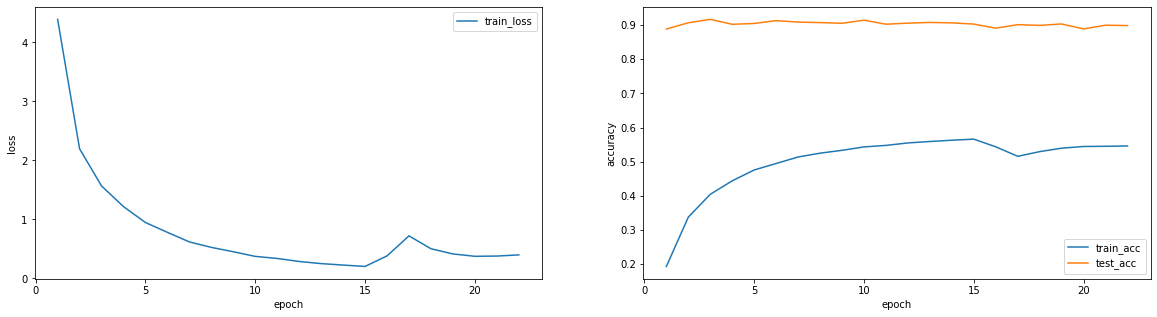

In [ ]:
import json,os
import matplotlib.pyplot as plt
import numpy as np

def check_results(dir_path):

    #----var
    # json_path = os.path.join(dir_path,'train_result.json')
    file_name = "train_result_"
    train_loss_list = list()
    train_acc_list = list()
    test_acc_list = list()
    exclude_list = ['train_loss_list','train_acc_list','test_loss_list','test_acc_list','save_dir']

    file_nums = [int(file.name.split(".")[0].split("_")[-1]) for file in os.scandir(dir_path) if
                 file.name.find(file_name) >= 0]
    seq = np.argsort(file_nums)

    for idx in seq:
        json_path = os.path.join(dir_path,file_name + str(file_nums[idx]) + ".json")

        #----read the json file
        if os.path.exists(json_path):
            with open(json_path, 'r') as f:
                content = json.load(f)

            print("--------{} parameters--------".format(file_name + str(file_nums[idx])))
            # ----display info except loss,acc
            for key, value in content.items():
                if key not in exclude_list:
                    print(key, ": ", value)

            # ----var parsing
            train_loss_list.extend(content['train_loss_list'])
            train_acc_list.extend(content['train_acc_list'])
            if "test_img_dir" in content.keys():
                test_acc_list.extend(content['test_acc_list'])

    # ----statistics
    print("--------Statistics--------")
    argmax = np.argmax(train_acc_list)
    print("The best training set accuracy is {} at epoch {}".format(train_acc_list[argmax], argmax + 1))
    if "test_img_dir" in content.keys():
        argmax = np.argmax(test_acc_list)
        print("The best test set accuracy is {} at epoch {}".format(test_acc_list[argmax], argmax + 1))


    #----plot loss results
    plt.figure(figsize=(20,5))

    x_num = [i+1 for i in range(len(train_loss_list))]

    plt.subplot(1,2,1)
    plt.plot(x_num,train_loss_list,label="train_loss")

    plt.legend()
    plt.ylabel("loss")
    plt.xlabel("epoch")

    #----plot acc results
    plt.subplot(1,2,2)
    plt.plot(x_num, train_acc_list, label="train_acc")
    if "test_img_dir" in content.keys():
        plt.plot(x_num, test_acc_list, label="test_acc")
    plt.legend()
    # plt.ylim((0.9, 0.97))  # limit the upper and lower bound of y-axis
    plt.ylabel("accuracy")
    plt.xlabel("epoch")


    #----show plots
    plt.show()












if __name__ == "__main__":
    # dir_path = "/content/drive/MyDrive/model"
    dir_path = '/content/drive/MyDrive/face-model'
    check_results(dir_path)